<a href="https://colab.research.google.com/github/misrapk/Data-Science-ML-Projects/blob/main/Use_ML_to_Allocate_Funding_for_Needed_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [168]:
# !pip install dataprep

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for PCA
from sklearn.decomposition import PCA

# New Section

# Load Dataset


In [170]:
data = pd.read_csv('/content/Country-data.csv')
dataInfo = pd.read_csv('/content/data-dictionary.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [171]:
print(dataInfo)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


# Information About Data set

In [172]:
data.shape

(167, 10)

In [173]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [175]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [176]:
#check for null values
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [177]:
#check for duplicate
data.duplicated().sum()

np.int64(0)

In [178]:
#check for unique values
data.nunique()

,0
country,167
child_mort,139
exports,147
health,147
imports,151
income,156
inflation,156
life_expec,127
total_fer,138
gdpp,157


In [179]:
data.loc[data.country == 'India'] # This locates rows where the 'country' column equals 'India'

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350


# Exploratory Data Analysis



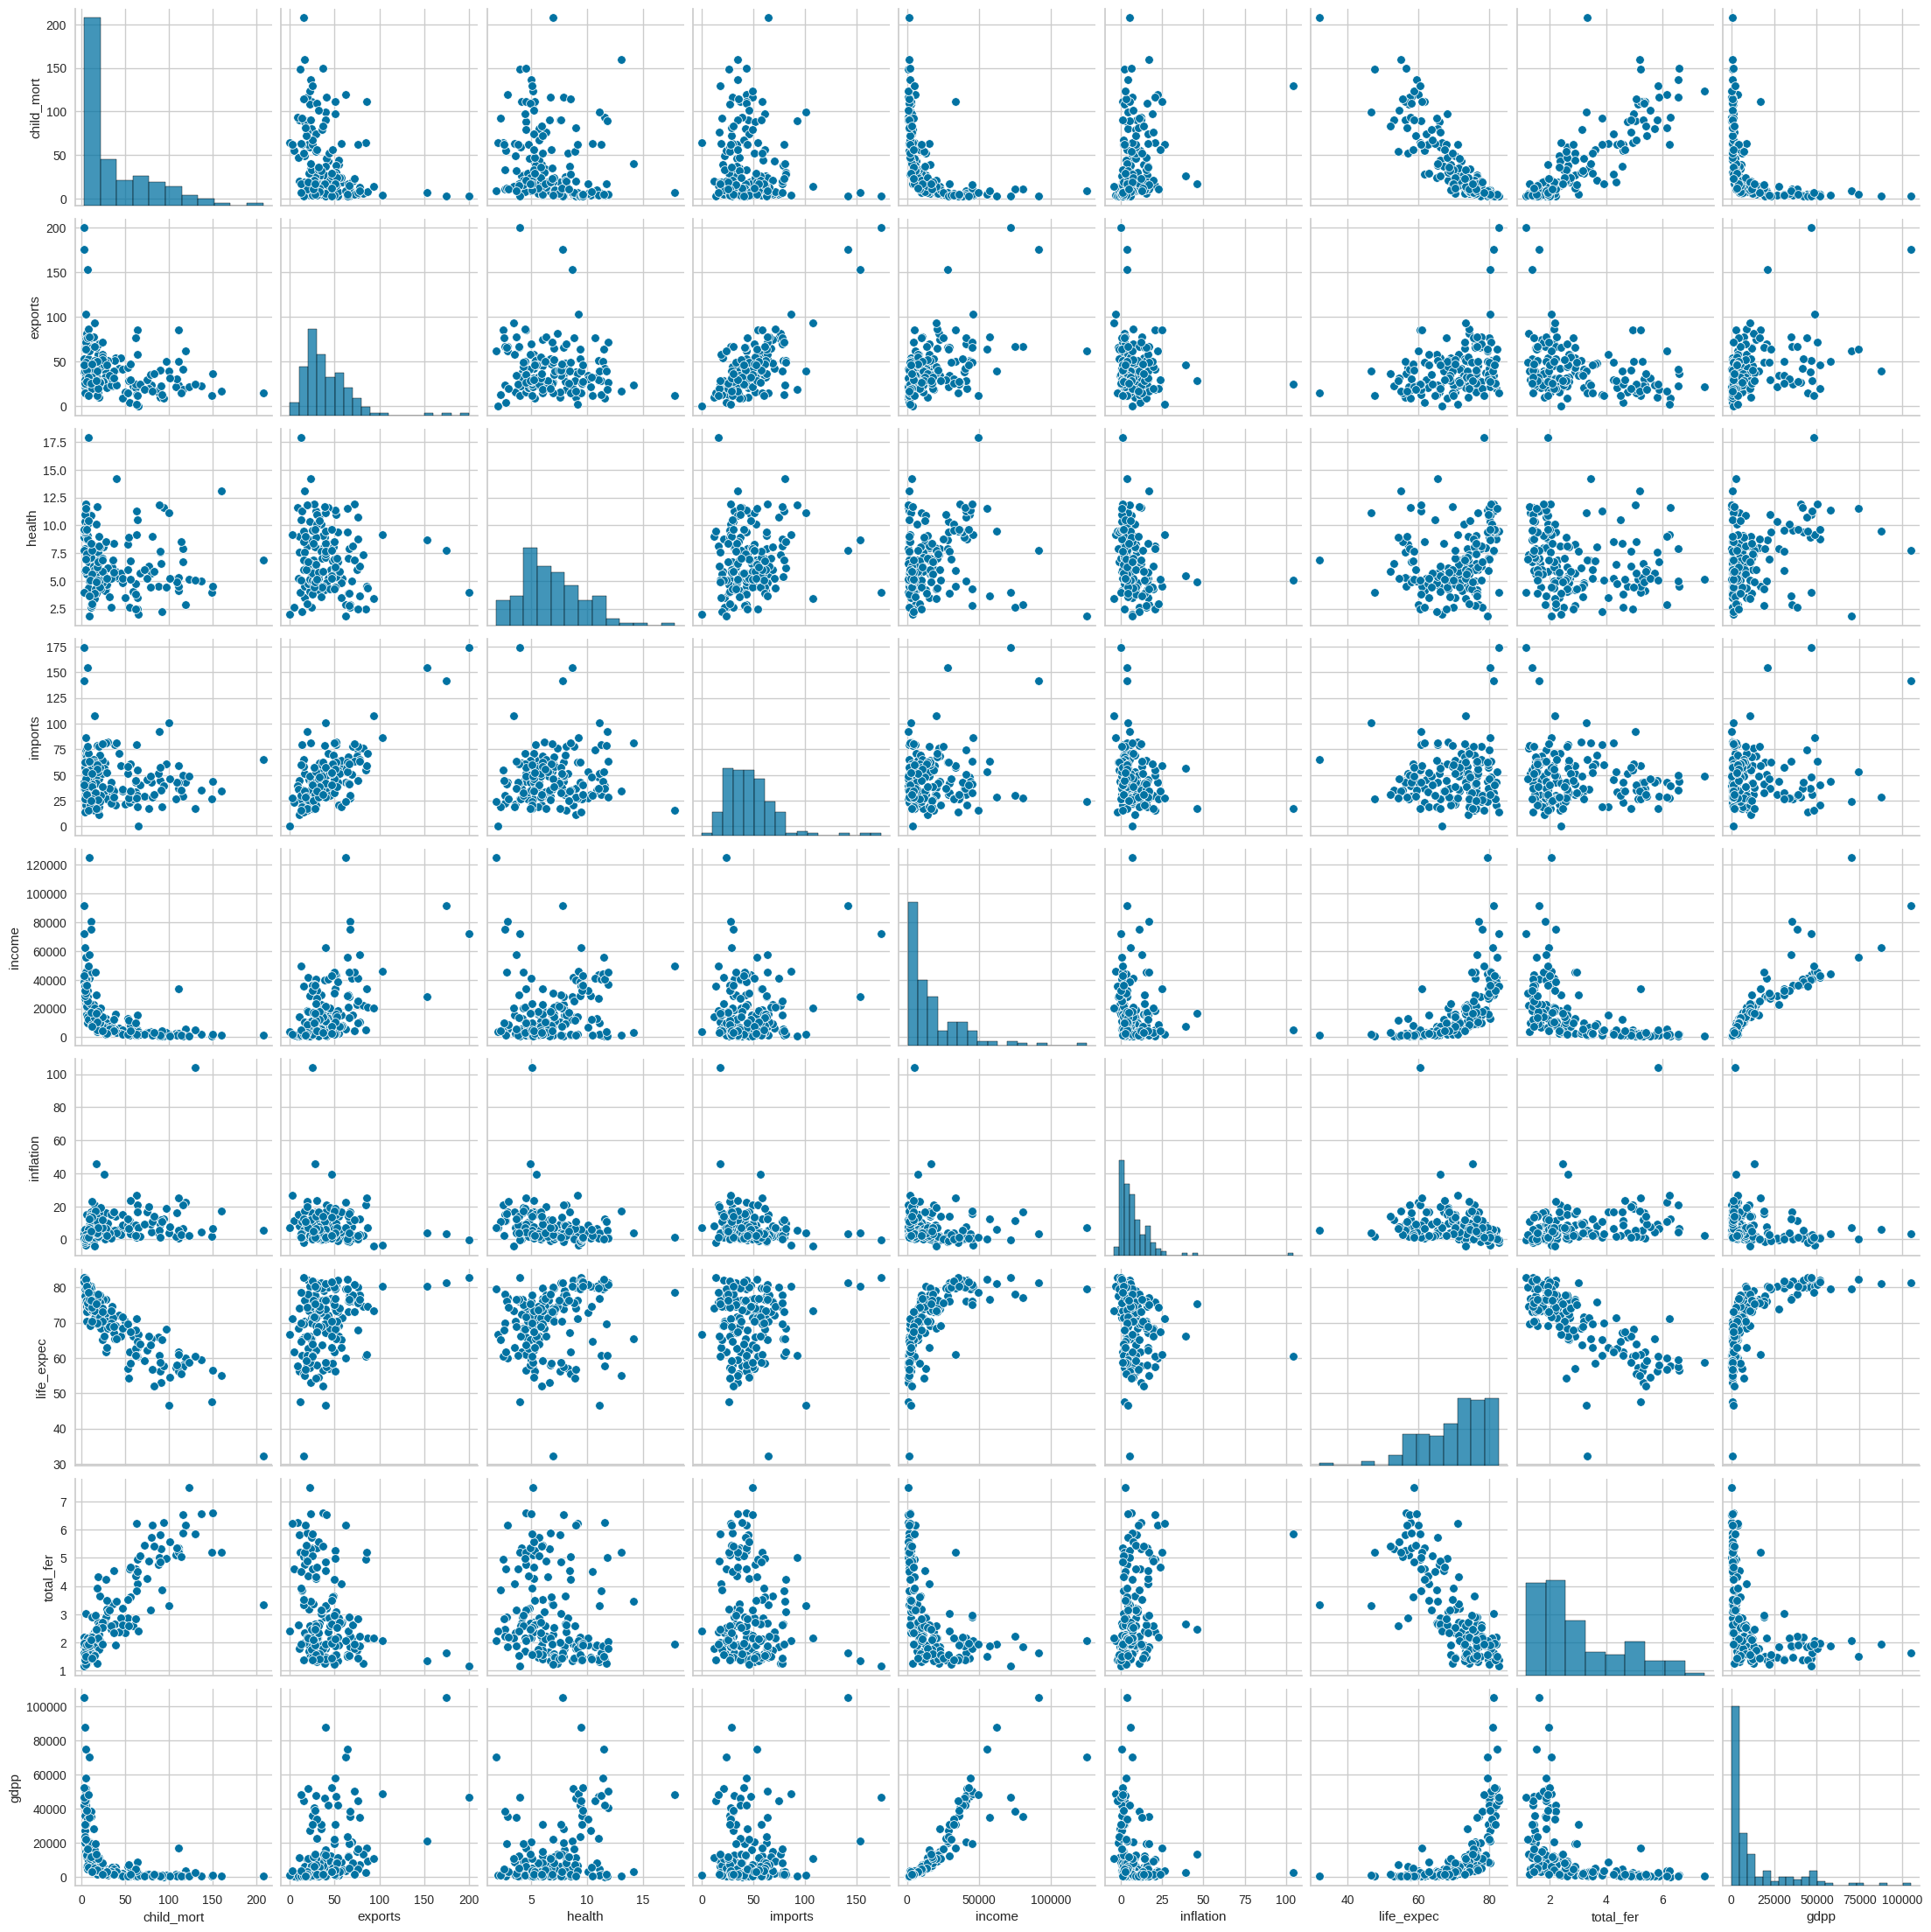

In [180]:
sns.pairplot(data)
plt.show()

In [181]:
col = list(data.columns)

numericalCol = col[1:]
categoricalCol = ['country']

print("Numerical Columns: ", numericalCol)
print("Categorical Columns: ", categoricalCol)


Numerical Columns:  ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
Categorical Columns:  ['country']


<ipython-input-182-1f5718f28fd9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-182-1f5718f28fd9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-182-1f5718f28fd9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

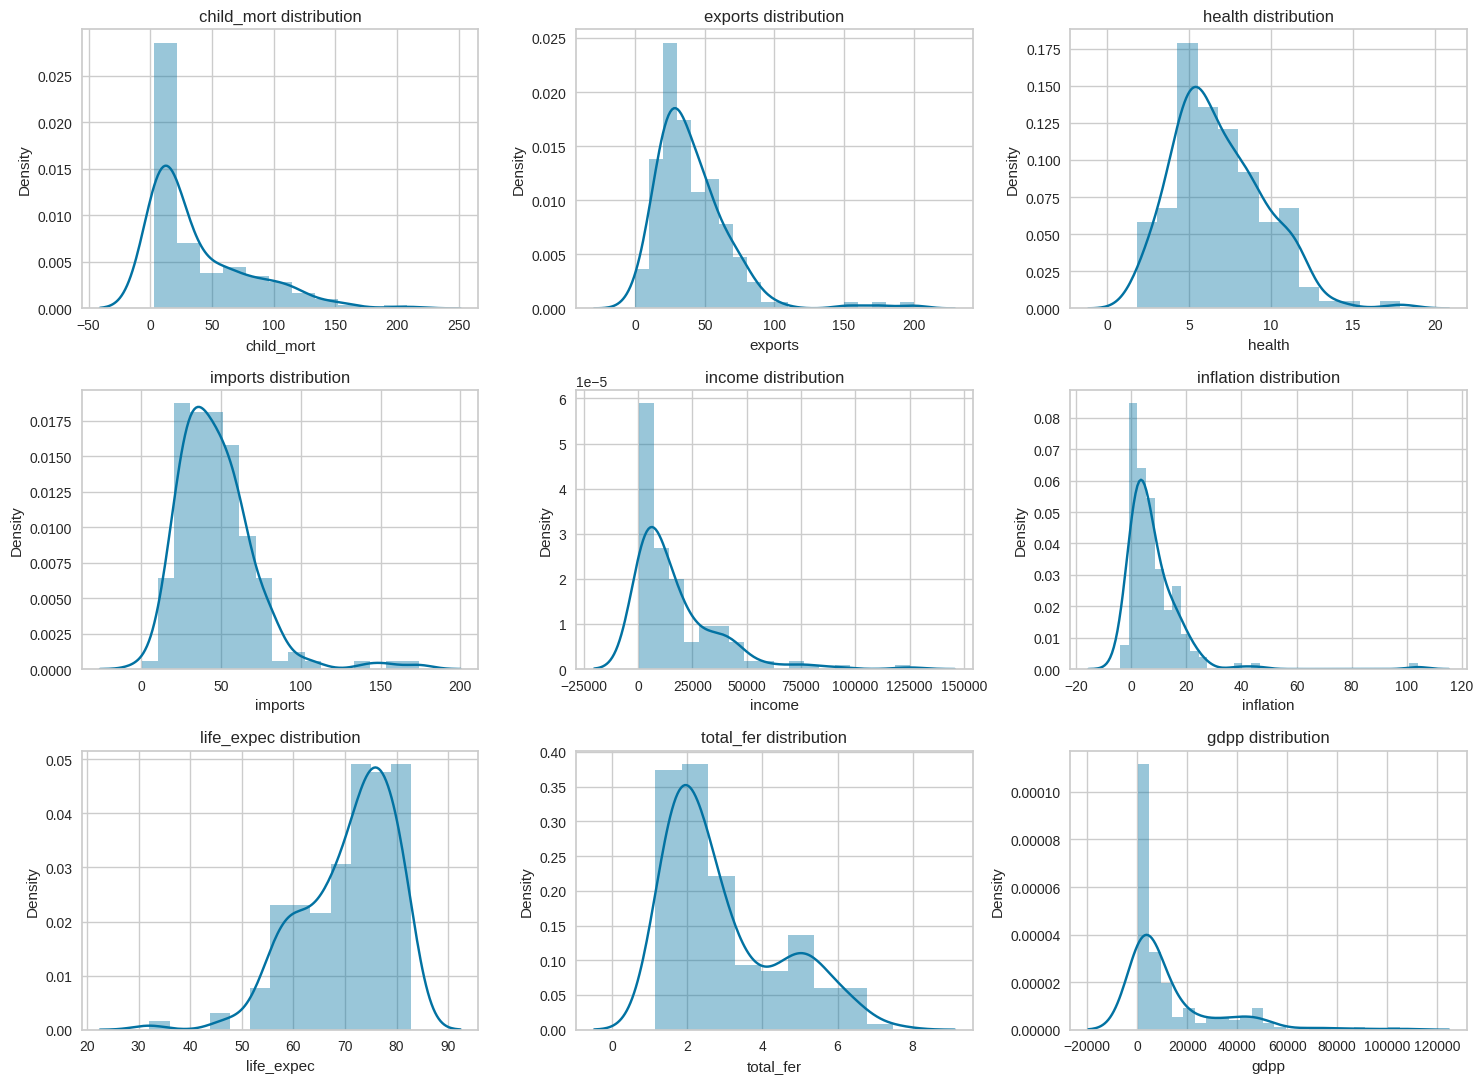

In [182]:
# plot the distplot
fig, ax =plt.subplots(nrows = 3, ncols=3, figsize=(15,11))

for i in range(len(numericalCol)):
  plt.subplot(3, 3, i+1)
  sns.distplot(data[numericalCol[i]])
  title = numericalCol[i] + ' distribution'
  plt.title(title)

plt.tight_layout()
plt.show()

In [183]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [184]:
data_numeric = data.select_dtypes(include=['number'])
data_numeric.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

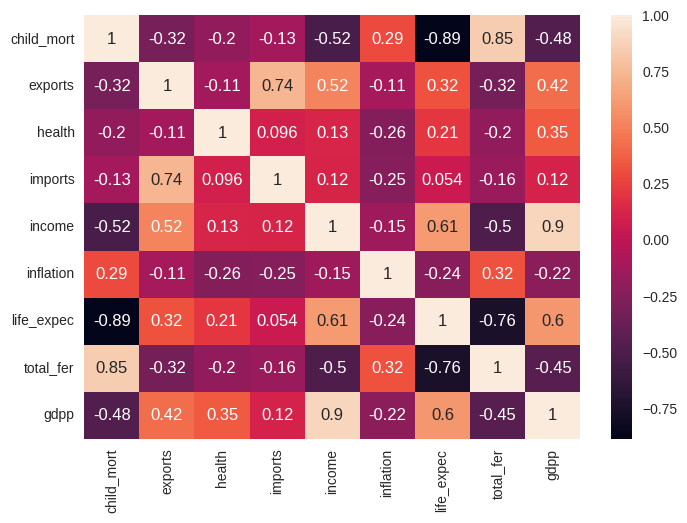

In [185]:

sns.heatmap(data_numeric.corr(method = 'pearson', min_periods =1 ), annot=True)

### Observation
1. life_exec is highly correlated with child_mort_
2. total_fert is highly correlated with child_mort
3. incomd is hihgly correlated with gdpp

In [186]:
###GDP Per capita
cat = ['High', 'Medium', 'Low']

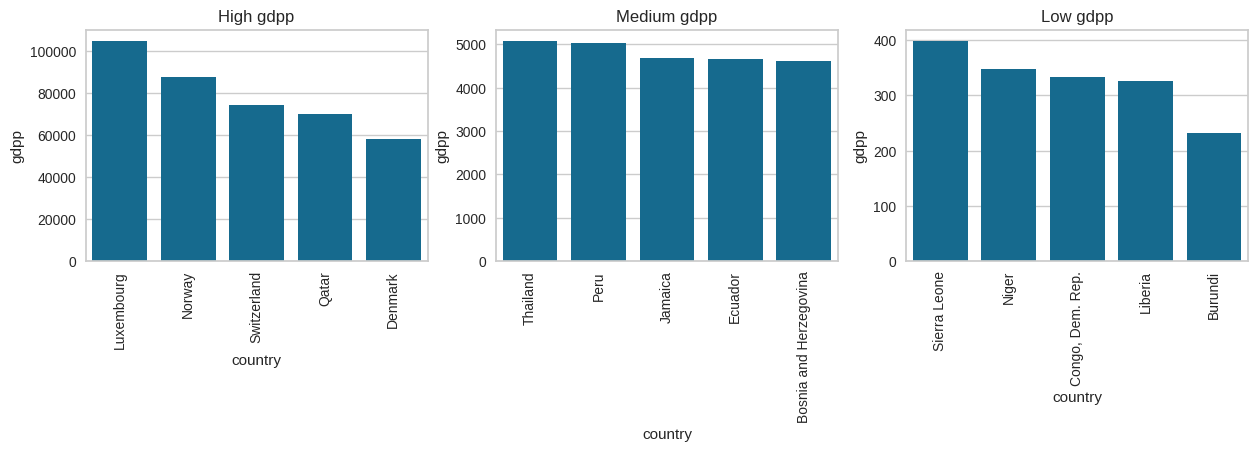

In [187]:
fig,ax = plt.subplots(1,3, figsize=(15, 3))
sns.barplot(x='country', y = 'gdpp', data = data.sort_values(by='gdpp', ascending=False).iloc[0:5], ax = ax[0])
sns.barplot(x='country', y = 'gdpp', data = data.sort_values(by='gdpp', ascending=False).iloc[80:85], ax = ax[1])
sns.barplot(x='country', y = 'gdpp', data = data.sort_values(by='gdpp', ascending=False).iloc[-5:], ax= ax[2])

for i in range(3):
  title = cat[i] + ' gdpp'
  ax[i].set_title(title)
  ax[i].tick_params(axis='x', labelrotation=90)
plt.show()

In [188]:
def catego_plot(feature, mainTitle, subplotTitle):
  fig,ax = plt.subplots(1,3, figsize=(16,4))
  sns.barplot(x='country', y = feature, data = data.sort_values(by=feature, ascending=False).iloc[:5], ax = ax[0])
  sns.barplot(x='country', y = feature, data = data.sort_values(by=feature, ascending=False).iloc[80:85], ax = ax[1])
  sns.barplot(x='country', y = feature, data = data.sort_values(by=feature, ascending=False).iloc[-5:], ax= ax[2])

  for i in range(3):
    title = cat[i] + ' ' + subplotTitle
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation=60)
  fig.suptitle(mainTitle, fontsize=15)

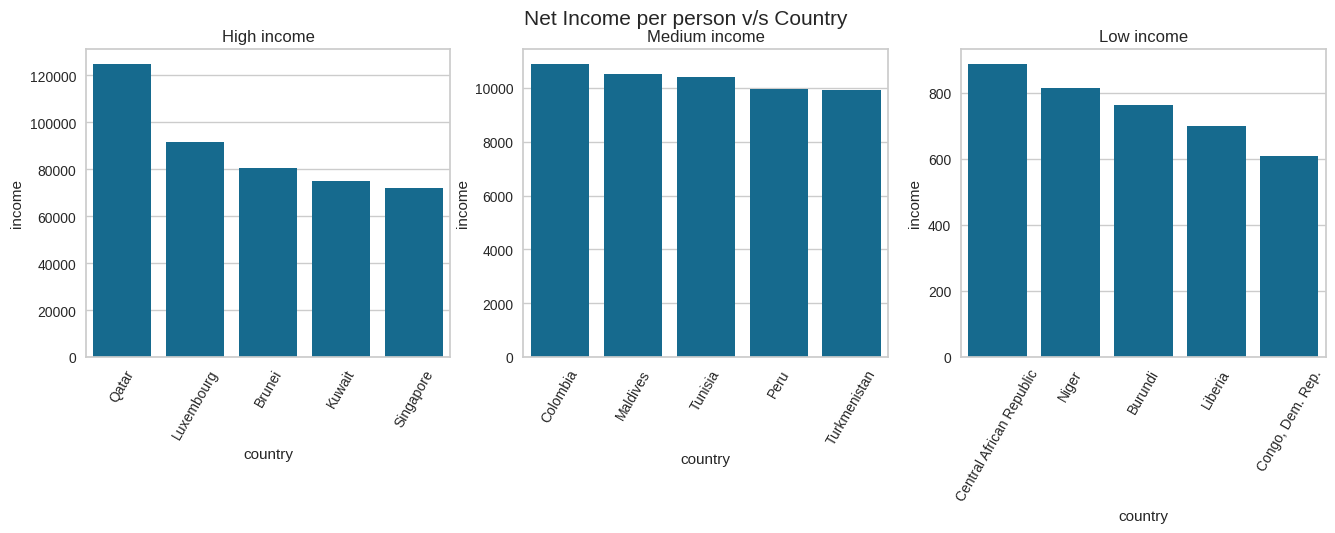

In [189]:
catego_plot('income', 'Net Income per person v/s Country', 'income')
plt.show()

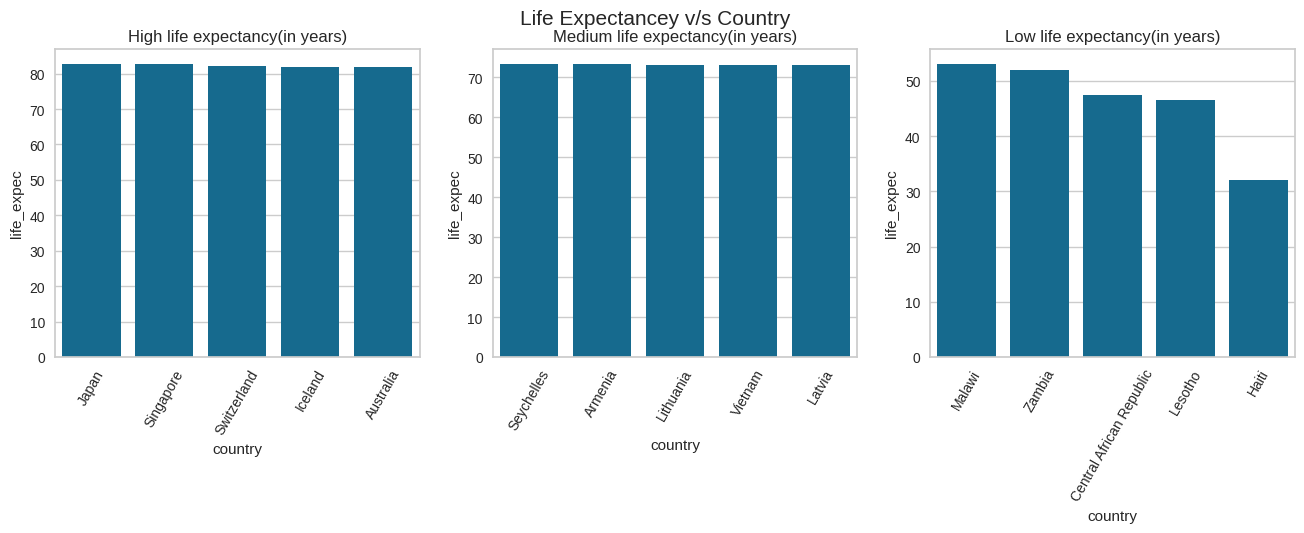

In [190]:
catego_plot('life_expec', 'Life Expectancey v/s Country', 'life expectancy(in years)')

In [191]:
numericalCol

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

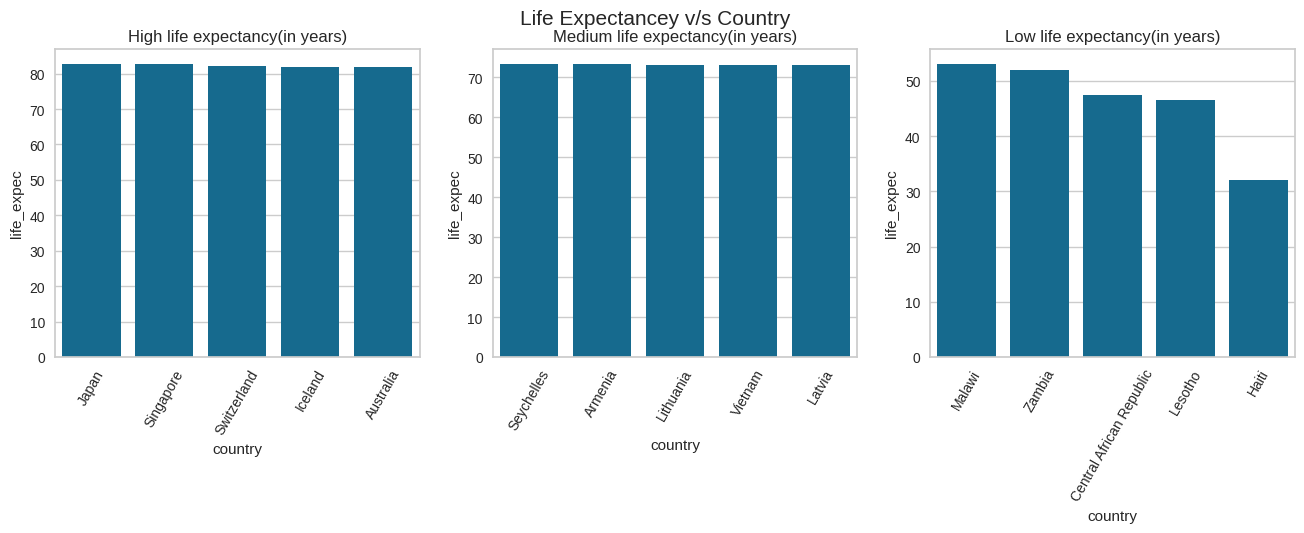

In [192]:
catego_plot('life_expec', 'Life Expectancey v/s Country', 'life expectancy(in years)')

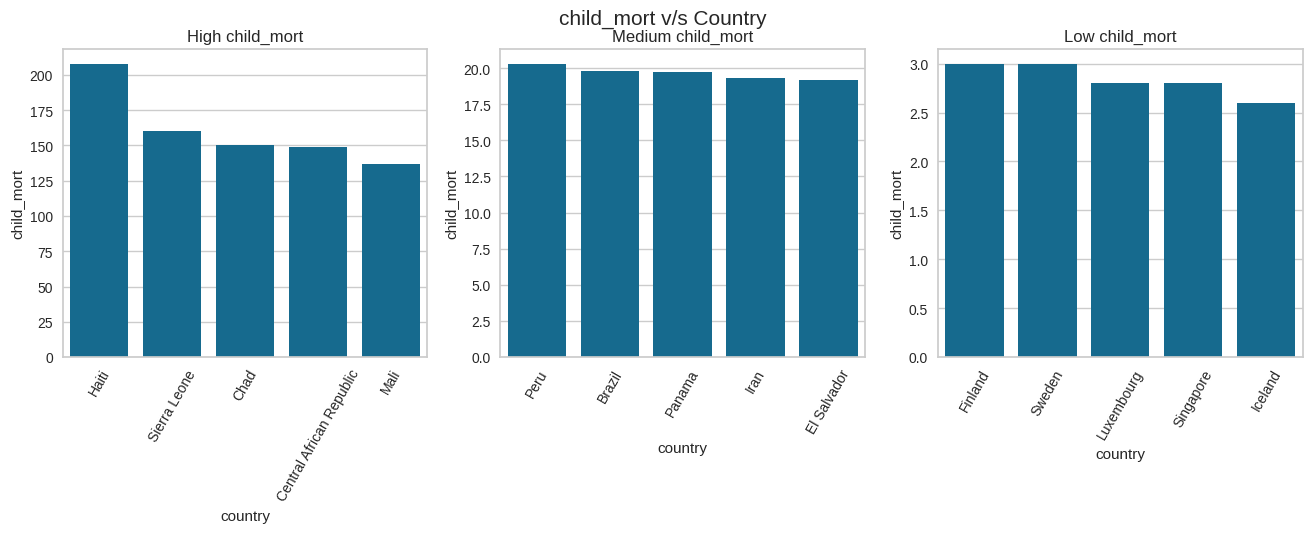

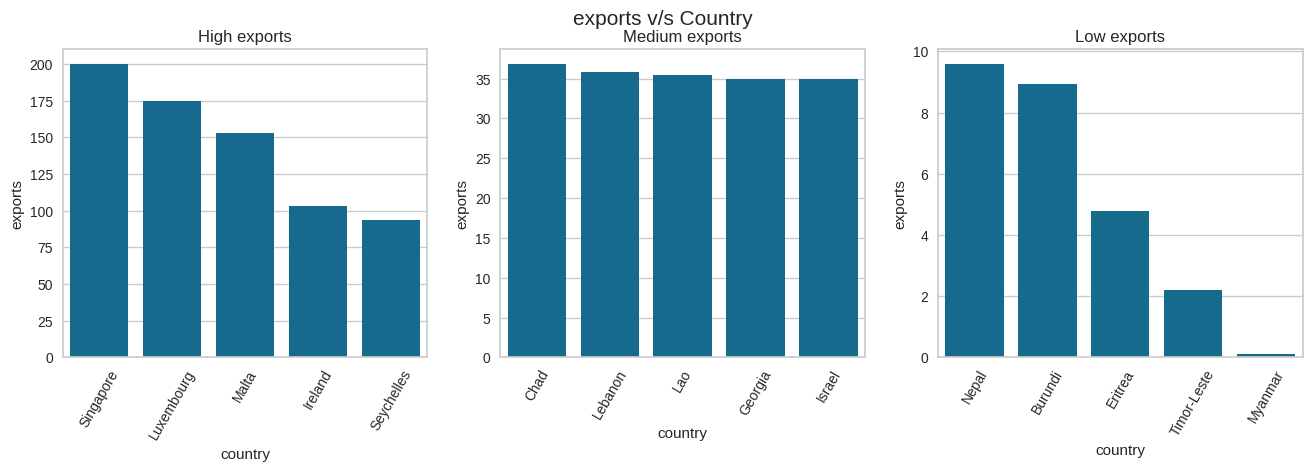

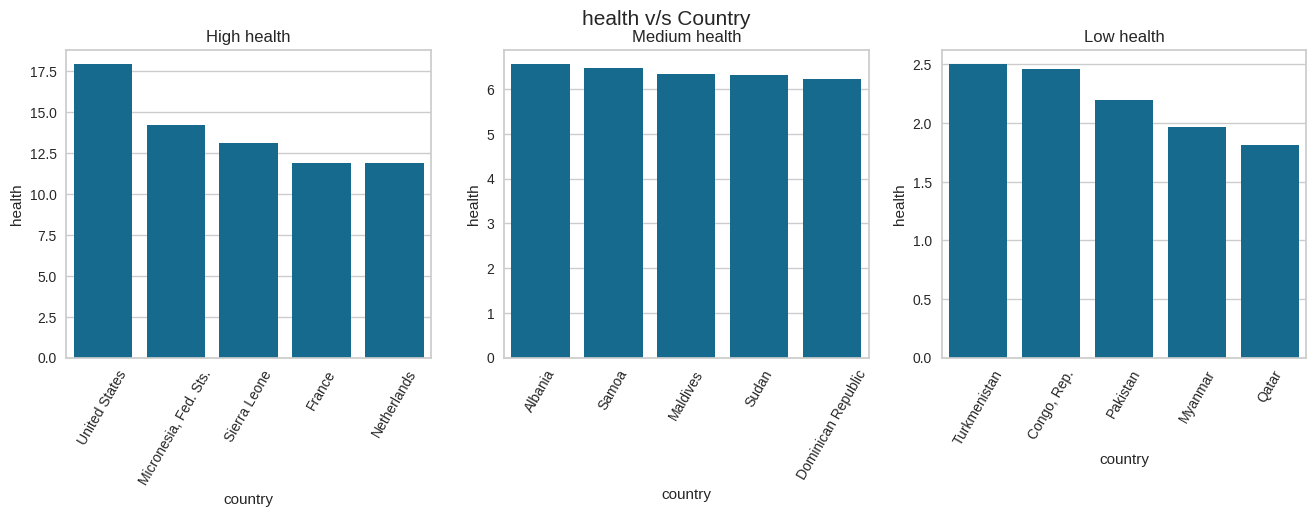

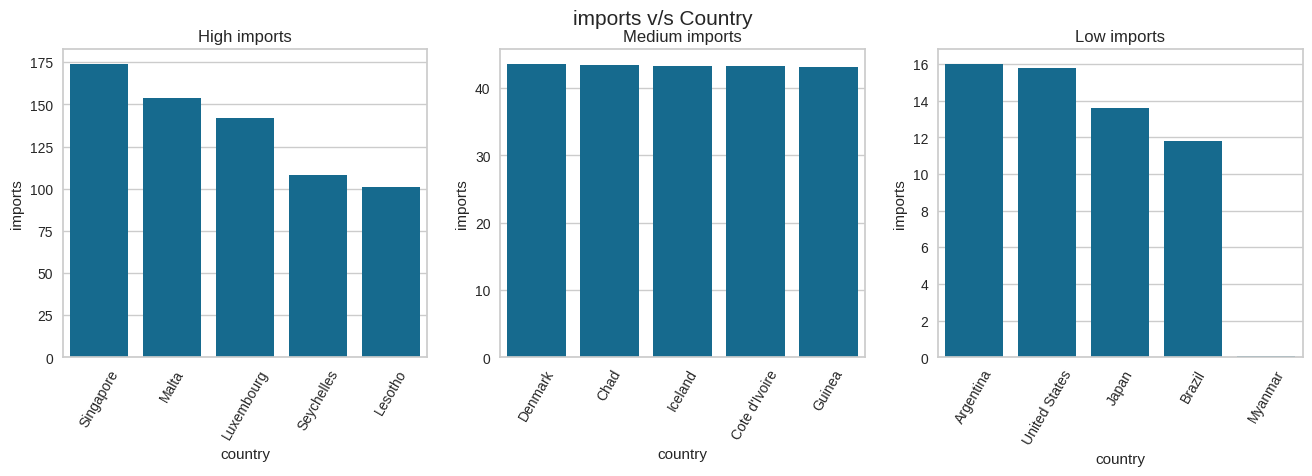

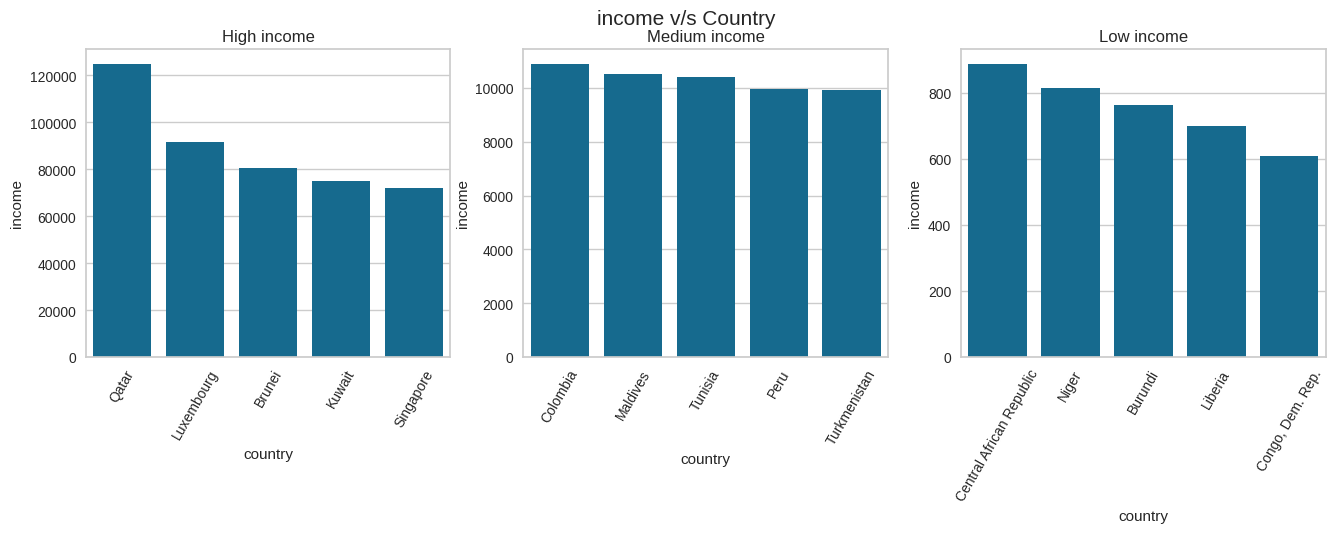

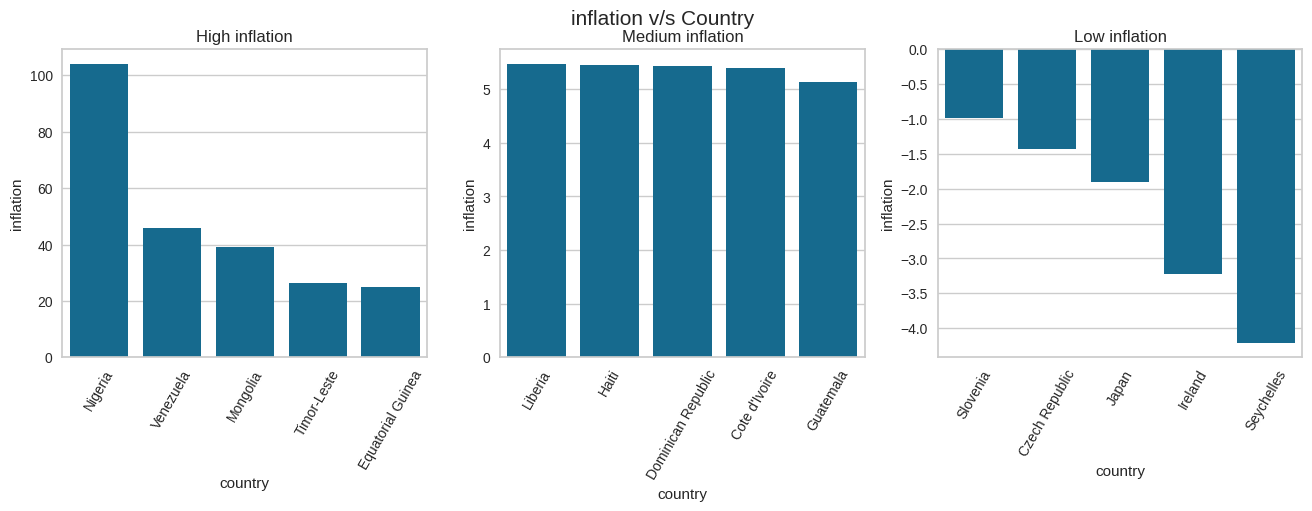

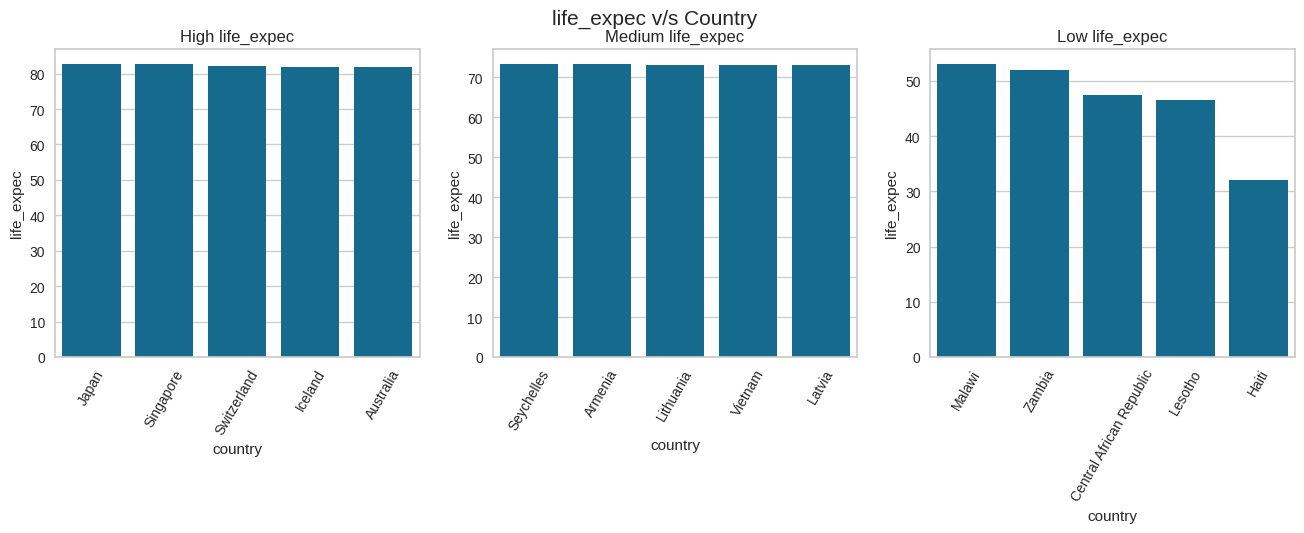

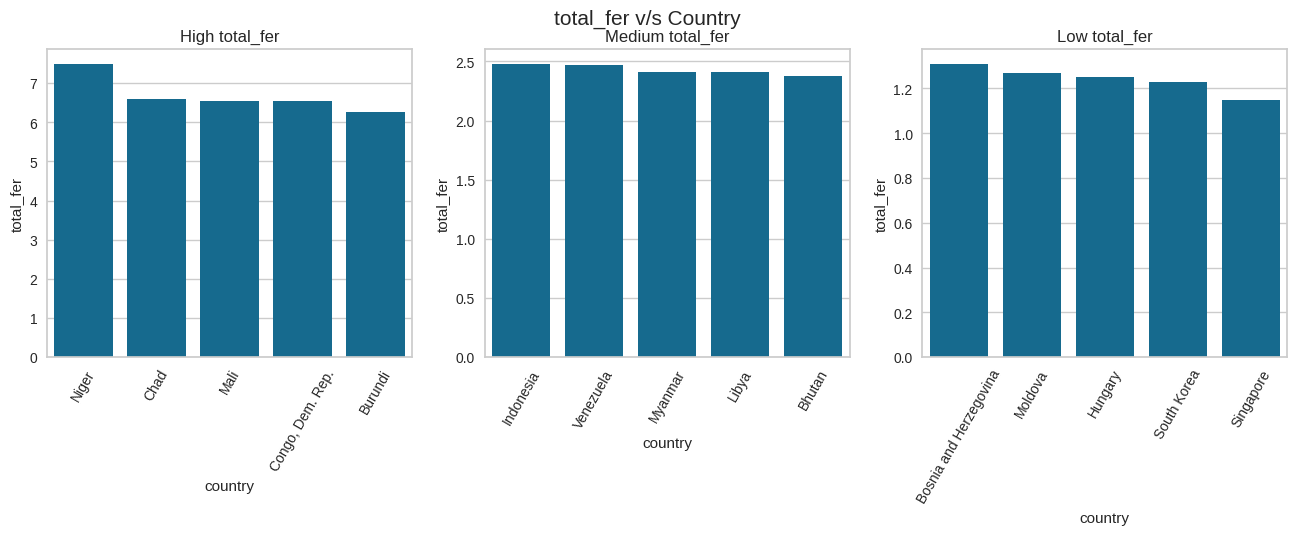

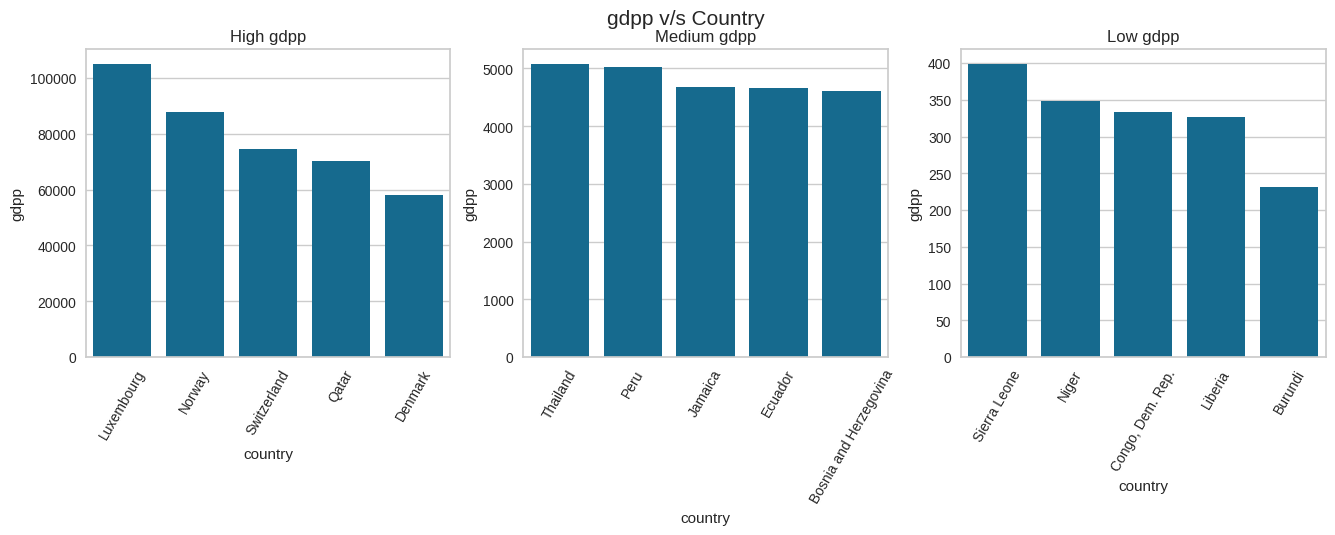

In [193]:
for i in numericalCol:
  title = i + ' v/s Country'
  catego_plot(i, title, i  )

###E Which countries need financial aid:


1.   Per capita income is lower than developed countries
2.   High Birth and low death rate
3. low health care.
4. Unemployment
5. Low wealth,
6. Income unequal or distribution of wealth is uneven.



### Box Plot for Univariate

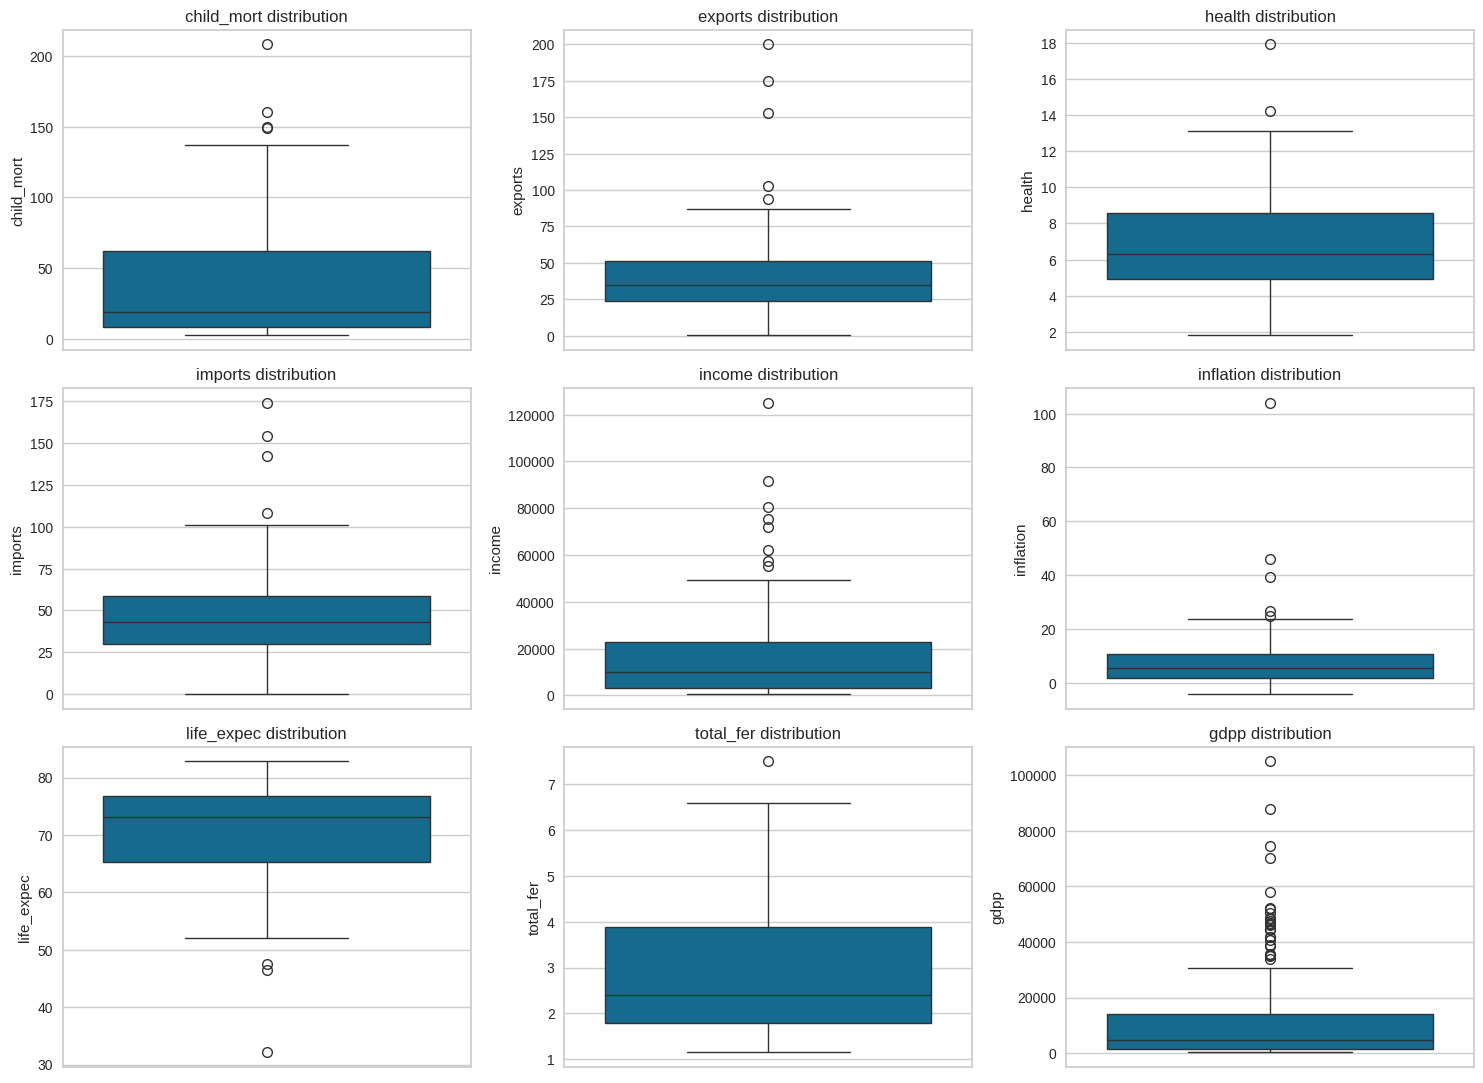

In [194]:
# sns.boxplot(data[numericalCol[2]])

# plot the distplot
fig, ax =plt.subplots(nrows = 3, ncols=3, figsize=(15,11))

for i in range(len(numericalCol)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data[numericalCol[i]])
  title = numericalCol[i] + ' distribution'
  plt.title(title)

plt.tight_layout()
plt.show()

In [195]:
indexes = np.where(data['gdpp']>30000)

len(indexes[0])

28

# Feature Engineering

In [196]:
df = data.copy()

In [197]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [198]:
df.shape

(167, 10)

In [199]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# PCA

In [200]:
df_scaled  = StandardScaler().fit_transform(df.drop(['country'], axis =1))


In [201]:
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [202]:
pca = PCA(svd_solver = 'auto')  #initialise the PCA
pca

PCA()

In [203]:
pca.fit(df_scaled)  #fit the scaled DF

PCA()

In [204]:
cum_exp_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cum_exp_ratio)

[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


Text(0, 0.5, 'Explained variance Ratio')

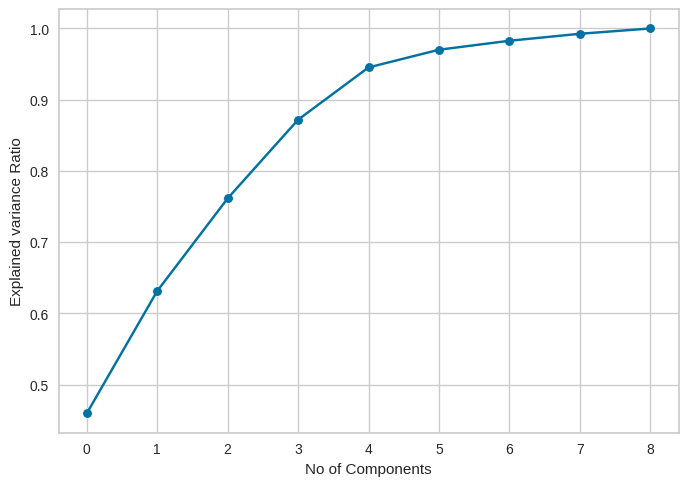

In [205]:
sns.lineplot(y = cum_exp_ratio, x = np.arange(0, len(cum_exp_ratio)))
sns.scatterplot(y = cum_exp_ratio, x = np.arange(0, len(cum_exp_ratio)))
plt.xlabel('No of Components')
plt.ylabel('Explained variance Ratio')

# Hierarichal Clustering

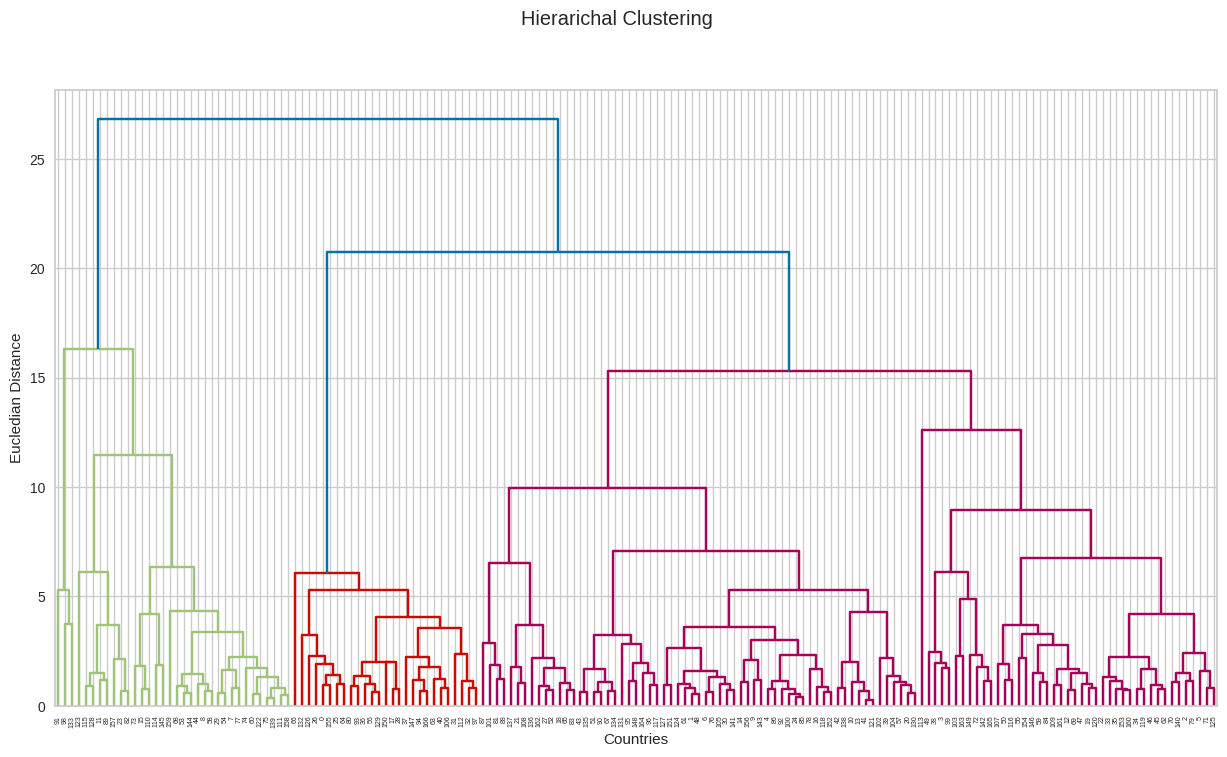

In [206]:
import scipy.cluster.hierarchy as sch   #import library

fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.suptitle('Hierarichal Clustering')
plt.xlabel('Countries')
plt.ylabel('Eucledian Distance')
plt.show()

# K Means Clustering

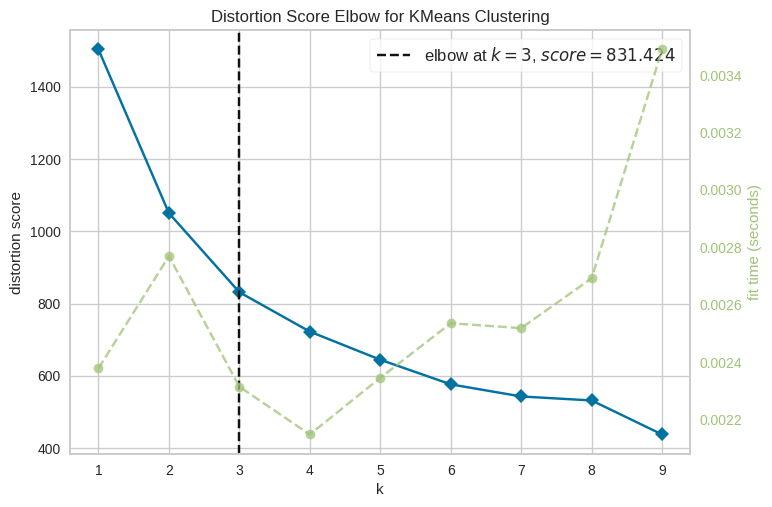

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [207]:
from sklearn.cluster import KMeans   #import Kmeans
from yellowbrick.cluster import KElbowVisualizer   #to visualise Elbow graph

model = KMeans()
visuliser = KElbowVisualizer(model, k =(1,10))
visuliser.fit(df_scaled)
visuliser.poof()


### OBservation
Based on Hirearichal Clustering and KMeansElbow method we can conclude that we can take 3 clusters means (k = 3).

In [208]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)


KMeans(n_clusters=3, random_state=1)

<Axes: xlabel='exports', ylabel='income'>

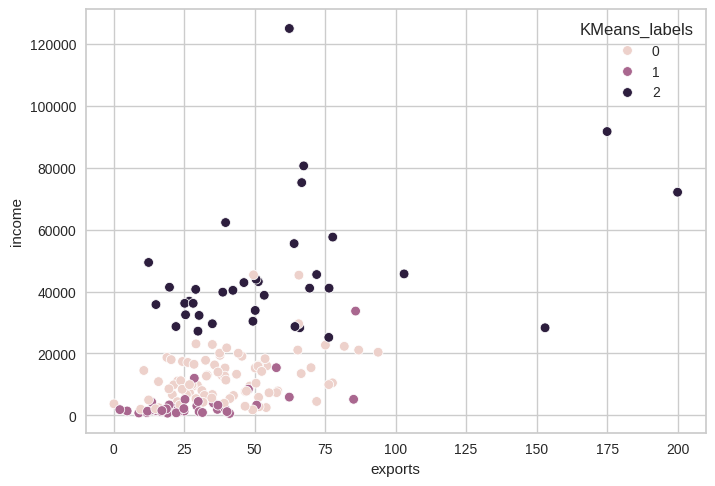

In [209]:
df['KMeans_labels'] = model.labels_

sns.scatterplot(data = df, x = 'exports', y='income', hue='KMeans_labels')

<Axes: xlabel='exports', ylabel='gdpp'>

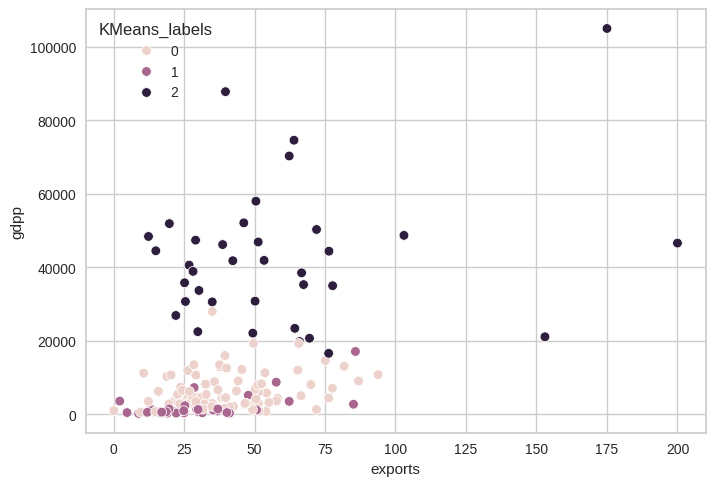

In [210]:
sns.scatterplot(data = df, x = 'exports', y='gdpp', hue='KMeans_labels')


<Axes: xlabel='child_mort', ylabel='income'>

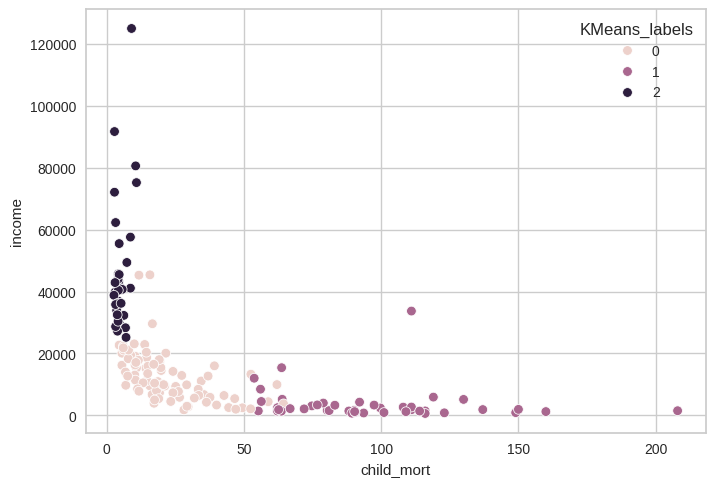

In [211]:
sns.scatterplot(data = df, x = 'child_mort', y='income', hue='KMeans_labels')




<Axes: xlabel='child_mort', ylabel='imports'>

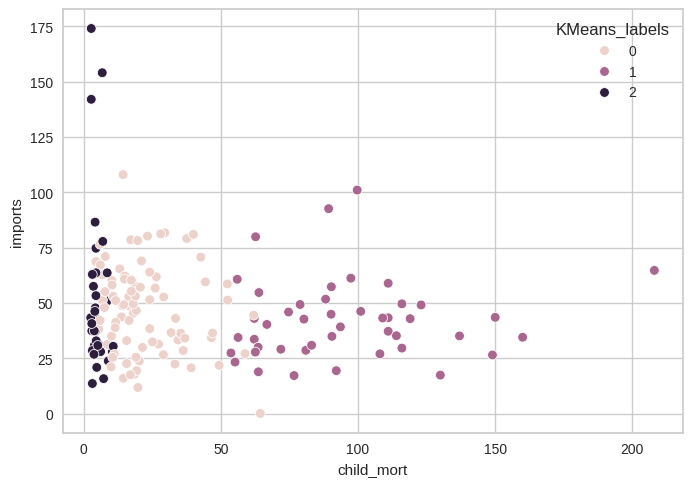

In [212]:
sns.scatterplot(data = df, x = 'child_mort', y='imports', hue='KMeans_labels')


<Axes: xlabel='child_mort', ylabel='health'>

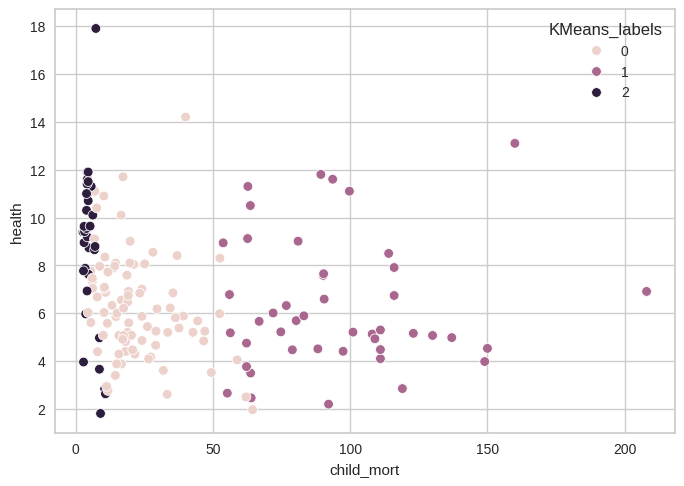

In [213]:
sns.scatterplot(data = df, x = 'child_mort', y='health', hue='KMeans_labels')


In [214]:
df.groupby(['KMeans_labels', df['country']]).mean()

child_mort  exports  health  imports  \
KMeans_labels country                                                      
0             Albania                     16.6     28.0    6.55     48.6   
              Algeria                     27.3     38.4    4.17     31.4   
              Antigua and Barbuda         10.3     45.5    6.03     58.9   
              Argentina                   14.5     18.9    8.10     16.0   
              Armenia                     18.1     20.8    4.40     45.3   
...                                        ...      ...     ...      ...   
2             Sweden                       3.0     46.2    9.63     40.7   
              Switzerland                  4.5     64.0   11.50     53.3   
              United Arab Emirates         8.6     77.7    3.66     63.6   
              United Kingdom               5.2     28.2    9.64     30.8   
              United States                7.3     12.4   17.90     15.8   

                                     income  inflation  life_expec  total_fer  \
KMeans_labels country                                                           
0             Albania                9930.0      4.490        76.3       1.65   
              Algeria               12900.0     16.100        76.5       2.89   
              Antigua and Barbuda   19100.0      1.440        76.8       2.13   
              Argentina             18700.0     20.900        75.8       2.37   
              Armenia                6700.0      7.770        73.3       1.69   
...                                     ...        ...         ...        ...   
2             Sweden                42900.0      0.991        81.5       1.98   
              Switzerland           55500.0      0.317        82.2       1.52   
              United Arab Emirates  57600.0     12.500        76.5       1.87   
              United Kingdom        36200.0      1.570        80.3       1.92   
              United States         49400.0      1.220        78.7       1.93   

                                       gdpp  
KMeans_labels country                        
0             Albania                4090.0  
              Algeria                4460.0  
              Antigua and Barbuda   12200.0  
              Argentina             10300.0  
              Armenia                3220.0  
...                                     ...  
2             Sweden                52100.0  
              Switzerland           74600.0  
              United Arab Emirates  35000.0  
              United Kingdom        38900.0  
              United States         48400.0  

[167 rows x 9 columns]

In [215]:
from sklearn.metrics import silhouette_score
print("SilHouettee Score: ", silhouette_score(df_scaled, labels = model.labels_))

SilHouettee Score:  0.285600988953231


# Visualise clusters on world Map

In [216]:
fund_cat = {1: 'Funding Needed', 0: 'May or May not need Funds', 2: 'No need of Funding'}
df['KMeans_labels'] = df['KMeans_labels'].map(fund_cat)

In [217]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Funding Needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,May or May not need Funds
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,May or May not need Funds
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Funding Needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,May or May not need Funds


In [223]:
import plotly.express as px

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              title='All Countries categories based on Funding needed!'
              )

In [224]:
# for African Countris

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              title='African Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'africa'
              )

In [226]:
# for African Countris

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              title='Asian Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'asia'
              )

africa
asia
europe
north america
south america
usa

In [233]:
# for African Countris

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              title='European Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'europe'
              )

In [234]:
# for African Countris

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              title='North American Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'north america'
              )

In [235]:
# for African Countris

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['KMeans_labels'],
              title='South American Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'south america'
              )

In [241]:
# list of Coutntries
print("Countries that need Help")
df[df['KMeans_labels']=='Funding Needed']['country']

Countries that need Help


,country
0,Afghanistan
3,Angola
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros
37,"Congo, Dem. Rep."
